**E-step**
___

In [1]:
import numpy as np
from scipy.stats import norm
np.random.seed(0)
X = np.linspace(-5,5,num=20)
X0 = X*np.random.rand(len(X))+10 # Create data cluster 1
X1 = X*np.random.rand(len(X))-10 # Create data cluster 2
X2 = X*np.random.rand(len(X)) # Create data cluster 3
X_tot = np.stack((X0,X1,X2)).flatten() # Combine the clusters to get the random datapoints from above
"""Create the array r with dimensionality nxK"""
r = np.zeros((len(X_tot),3))  
print('Dimensionality','=',np.shape(r))
"""Instantiate the random gaussians"""
gauss_1 = norm(loc=-5,scale=5) 
gauss_2 = norm(loc=8,scale=3)
gauss_3 = norm(loc=1.5,scale=1)
"""
Probability for each datapoint x_i to belong to gaussian g 
"""
for c,g in zip(range(3),[gauss_1,gauss_2,gauss_3]):
    r[:,c] = g.pdf(X_tot) # Write the probability that x belongs to gaussian c in column c. 
                          # Therewith we get a 60x3 array filled with the probability that each x_i belongs to one of the gaussians
"""
Normalize the probabilities such that each row of r sums to 1
"""
for i in range(len(r)):
    r[i] = r[i]/np.sum(r,axis=1)[i] 
"""In the last calculation we normalized the probabilites r_ic. So each row i in r gives us the probability for x_i 
to belong to one gaussian (one column per gaussian). Since we want to know the probability that x_i belongs 
to gaussian g, we have to do smth. like a simple calculation of percentage where we want to know how likely it is in % that
x_i belongs to gaussian g. To realize this, we must dive the probability of each r_ic by the total probability r_i (this is done by 
summing up each row in r and divide each value r_ic by sum(np.sum(r,axis=1)[r_i] )). To get this,
look at the above plot and pick an arbitrary datapoint. Pick one gaussian and imagine the probability that this datapoint
belongs to this gaussian. This value will normally be small since the point is relatively far away right? So what is
the percentage that this point belongs to the chosen gaussian? --> Correct, the probability that this datapoint belongs to this 
gaussian divided by the sum of the probabilites for this datapoint for all three gaussians."""
    
print(r)
print(np.sum(r,axis=1)) # As we can see, as result each row sums up to one, just as we want it.

Dimensionality = (60, 3)
[[2.97644006e-02 9.70235407e-01 1.91912550e-07]
 [3.85713024e-02 9.61426220e-01 2.47747304e-06]
 [2.44002651e-02 9.75599713e-01 2.16252823e-08]
 [1.86909096e-02 9.81309090e-01 8.07574590e-10]
 [1.37640773e-02 9.86235923e-01 9.93606589e-12]
 [1.58674083e-02 9.84132592e-01 8.42447356e-11]
 [1.14191259e-02 9.88580874e-01 4.48947365e-13]
 [1.34349421e-02 9.86565058e-01 6.78305927e-12]
 [1.11995848e-02 9.88800415e-01 3.18533028e-13]
 [8.57645259e-03 9.91423547e-01 1.74498648e-15]
 [7.64696969e-03 9.92353030e-01 1.33051021e-16]
 [7.10275112e-03 9.92897249e-01 2.22285146e-17]
 [6.36154765e-03 9.93638452e-01 1.22221112e-18]
 [4.82376290e-03 9.95176237e-01 1.55549544e-22]
 [7.75866904e-03 9.92241331e-01 1.86665135e-16]
 [7.52759691e-03 9.92472403e-01 9.17205413e-17]
 [8.04550643e-03 9.91954494e-01 4.28205323e-16]
 [3.51864573e-03 9.96481354e-01 9.60903037e-30]
 [3.42631418e-03 9.96573686e-01 1.06921949e-30]
 [3.14390460e-03 9.96856095e-01 3.91217273e-35]
 [1.00000000e+0

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
from scipy.stats import norm
np.random.seed(0)
X = np.linspace(-5,5,num=20)
X0 = X*np.random.rand(len(X))+10 # Create data cluster 1
X1 = X*np.random.rand(len(X))-10 # Create data cluster 2
X2 = X*np.random.rand(len(X)) # Create data cluster 3
X_tot = np.stack((X0,X1,X2)).flatten() # Combine the clusters to get the random datapoints from above
"""Create the array r with dimensionality nxK"""
r = np.zeros((len(X_tot),3))  
print('Dimensionality','=',np.shape(r))
"""Instantiate the random gaussians"""
gauss_1 = norm(loc=-5,scale=5) 
gauss_2 = norm(loc=8,scale=3)
gauss_3 = norm(loc=1.5,scale=1)
"""Instantiate the random pi_c"""
pi = np.array([1/3,1/3,1/3]) # We expect to have three clusters 
"""
Probability for each datapoint x_i to belong to gaussian g 
"""
for c,g,p in zip(range(3),[gauss_1,gauss_2,gauss_3],pi):
    r[:,c] = p*g.pdf(X_tot) # Write the probability that x belongs to gaussian c in column c. 
                          # Therewith we get a 60x3 array filled with the probability that each x_i belongs to one of the gaussians
"""
Normalize the probabilities such that each row of r sums to 1 and weight it by pi_c == the fraction of points belonging to 
cluster c
"""
for i in range(len(r)):
    r[i] = r[i]/(np.sum(pi)*np.sum(r,axis=1)[i])
"""In the last calculation we normalized the probabilites r_ic. So each row i in r gives us the probability for x_i 
to belong to one gaussian (one column per gaussian). Since we want to know the probability that x_i belongs 
to gaussian g, we have to do smth. like a simple calculation of percentage where we want to know how likely it is in % that
x_i belongs to gaussian g. To realize this we must dive the probability of each r_ic by the total probability r_i (this is done by 
summing up each row in r and divide each value r_ic by sum(np.sum(r,axis=1)[r_i] )). To get this,
look at the above plot and pick an arbitrary datapoint. Pick one gaussian and imagine the probability that this datapoint
belongs to this gaussian. This value will normally be small since the point is relatively far away right? So what is
the percentage that this point belongs to the chosen gaussian? --> Correct, the probability that this datapoint belongs to this 
gaussian divided by the sum of the probabilites for this datapoint and all three gaussians. Since we don't know how many
point belong to each cluster c and threwith to each gaussian c, we have to make assumptions and in this case simply said that we 
assume that the points are equally distributed over the three clusters."""
    
print(r)
print(np.sum(r,axis=1)) # As we can see, as result each row sums up to one, just as we want it.

Dimensionality = (60, 3)
[[2.97644006e-02 9.70235407e-01 1.91912550e-07]
 [3.85713024e-02 9.61426220e-01 2.47747304e-06]
 [2.44002651e-02 9.75599713e-01 2.16252823e-08]
 [1.86909096e-02 9.81309090e-01 8.07574590e-10]
 [1.37640773e-02 9.86235923e-01 9.93606589e-12]
 [1.58674083e-02 9.84132592e-01 8.42447356e-11]
 [1.14191259e-02 9.88580874e-01 4.48947365e-13]
 [1.34349421e-02 9.86565058e-01 6.78305927e-12]
 [1.11995848e-02 9.88800415e-01 3.18533028e-13]
 [8.57645259e-03 9.91423547e-01 1.74498648e-15]
 [7.64696969e-03 9.92353030e-01 1.33051021e-16]
 [7.10275112e-03 9.92897249e-01 2.22285146e-17]
 [6.36154765e-03 9.93638452e-01 1.22221112e-18]
 [4.82376290e-03 9.95176237e-01 1.55549544e-22]
 [7.75866904e-03 9.92241331e-01 1.86665135e-16]
 [7.52759691e-03 9.92472403e-01 9.17205413e-17]
 [8.04550643e-03 9.91954494e-01 4.28205323e-16]
 [3.51864573e-03 9.96481354e-01 9.60903037e-30]
 [3.42631418e-03 9.96573686e-01 1.06921949e-30]
 [3.14390460e-03 9.96856095e-01 3.91217273e-35]
 [1.00000000e+0

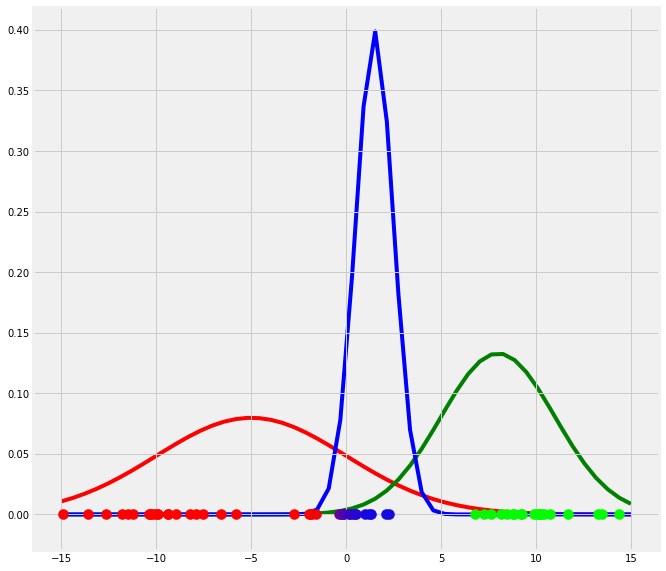

In [26]:
"""Plot the data"""
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
for i in range(len(r)):
    ax0.scatter(X_tot[i],0,c=np.array([r[i][0],r[i][1],r[i][2]]),s=100) # We have defined the first column as red, the second as
                                                                        # green and the third as blue
for g,c in zip([gauss_1.pdf(np.linspace(-15,15)),gauss_2.pdf(np.linspace(-15,15)),gauss_3.pdf(np.linspace(-15,15))],['r','g','b']):
    ax0.plot(np.linspace(-15,15),g,c=c,zorder=0)
    
plt.show()

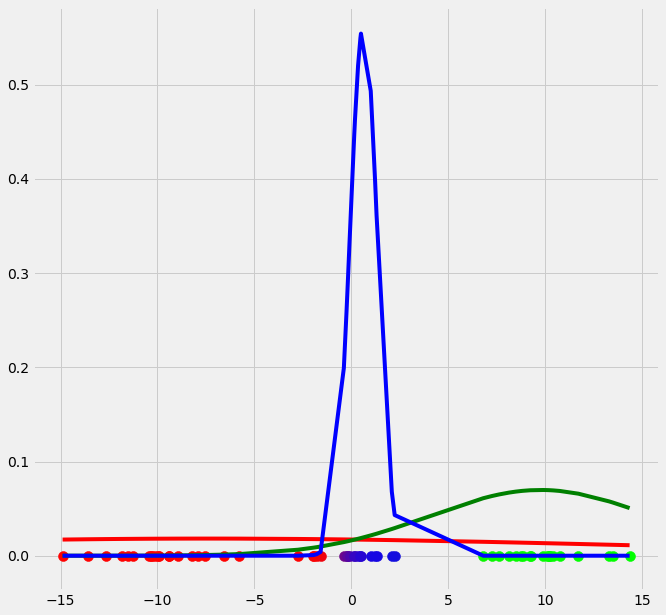

In [35]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
from scipy.stats import norm
np.random.seed(0)
X = np.linspace(-5,5,num=20)
X0 = X*np.random.rand(len(X))+10 # Create data cluster 1
X1 = X*np.random.rand(len(X))-10 # Create data cluster 2
X2 = X*np.random.rand(len(X)) # Create data cluster 3
X_tot = np.stack((X0,X1,X2)).flatten() # Combine the clusters to get the random datapoints from above
"""
E-Step
"""
"""Create the array r with dimensionality nxK"""
r = np.zeros((len(X_tot),3))  
"""Instantiate the random gaussians"""
gauss_1 = norm(loc=-5,scale=5) 
gauss_2 = norm(loc=8,scale=3)
gauss_3 = norm(loc=1.5,scale=1)
"""Instantiate the random mu_c"""
m = np.array([1/3,1/3,1/3]) # We expect to have three clusters 
pi = m/np.sum(m)
"""
Probability for each datapoint x_i to belong to gaussian g 
"""
for c,g,p in zip(range(3),[gauss_1,gauss_2,gauss_3],pi):
    r[:,c] = p*g.pdf(X_tot) # Write the probability that x belongs to gaussian c in column c. 
                          # Therewith we get a 60x3 array filled with the probability that each x_i belongs to one of the gaussians
"""
Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points belonging to 
cluster c
"""
for i in range(len(r)):
    r[i] = r[i]/(np.sum(pi)*np.sum(r,axis=1)[i])
"""M-Step"""
"""calculate m_c"""
m_c = []
for c in range(len(r[0])):
    m = np.sum(r[:,c])
    m_c.append(m) # For each cluster c, calculate the m_c and add it to the list m_c
    
"""calculate pi_c"""
pi_c = []
for m in m_c:
    pi_c.append(m/np.sum(m_c)) # For each cluster c, calculate the fraction of points pi_c which belongs to cluster c
"""calculate mu_c"""
mu_c = np.sum(X_tot.reshape(len(X_tot),1)*r, axis=0) / m_c
"""calculate var_c"""
var_c = []
for c in range(len(r[0])):
    var_c.append(
        (1/m_c[c])*
        np.dot(((np.array(r[:,c]).reshape(60,1))*
                (X_tot.reshape(len(X_tot),1)-mu_c[c])).T, 
               (X_tot.reshape(len(X_tot),1)-mu_c[c])
        )
    )
    
"""Update the gaussians"""
gauss_1 = norm(loc=mu_c[0],scale=var_c[0]) 
gauss_2 = norm(loc=mu_c[1],scale=var_c[1])
gauss_3 = norm(loc=mu_c[2],scale=var_c[2])
"""Plot the data"""
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
for i in range(len(r)):
    ax0.scatter(X_tot[i],0,c=np.array([r[i][0],r[i][1],r[i][2]]),s=100) 
"""Plot the gaussians"""
for g,c in zip([gauss_1.pdf(np.sort(X_tot).reshape(60,1)),gauss_2.pdf(np.sort(X_tot).reshape(60,1)),gauss_3.pdf(np.sort(X_tot).reshape(60,1))],['r','g','b']):
    ax0.plot(np.sort(X_tot),g,c=c)
    
    
plt.show()

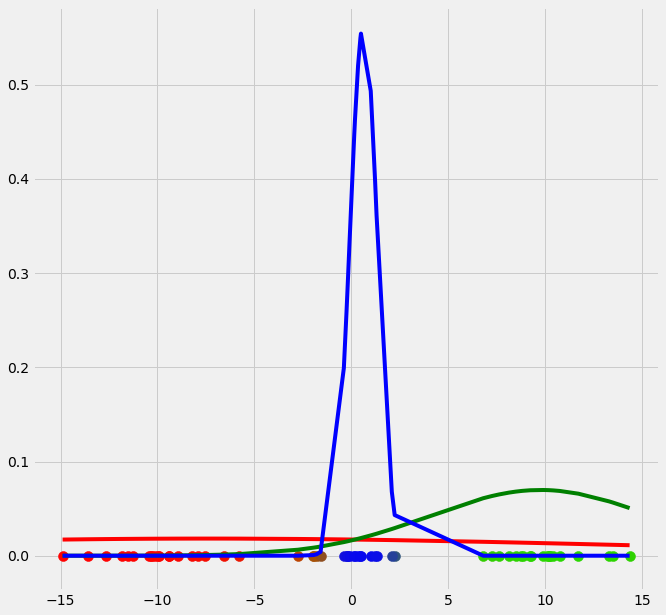

In [43]:
"""update r"""
"""
Probability for each datapoint x_i to belong to gaussian g 
"""
# Mind that we use the new pi_c here
for c,g,p in zip(range(3),[gauss_1,gauss_2,gauss_3],pi):
    r[:,c] = p*g.pdf(X_tot) 
"""
Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points belonging to 
cluster c
"""
for i in range(len(r)):
    r[i] = r[i]/(np.sum(pi_c)*np.sum(r,axis=1)[i])
"""Plot the data"""
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
for i in range(len(r)):
    ax0.scatter(X_tot[i],0,c=np.array([r[i][0],r[i][1],r[i][2]]),s=100) # We have defined the first column as red, the second as
                                                                        # green and the third as blue
        
"""Plot the gaussians"""
for g,c in zip([gauss_1.pdf(np.sort(X_tot).reshape(60,1)),gauss_2.pdf(np.sort(X_tot).reshape(60,1)),gauss_3.pdf(np.sort(X_tot).reshape(60,1))],['r','g','b']):
    ax0.plot(np.sort(X_tot),g,c=c)
        
        
        
plt.show()

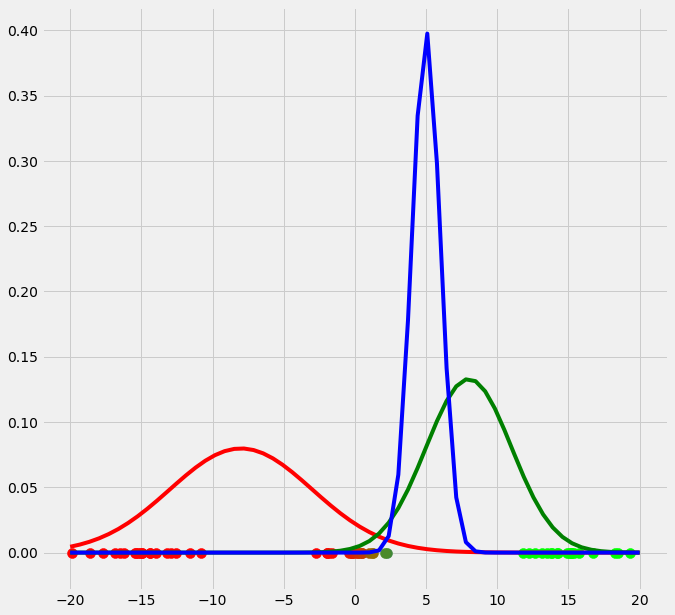

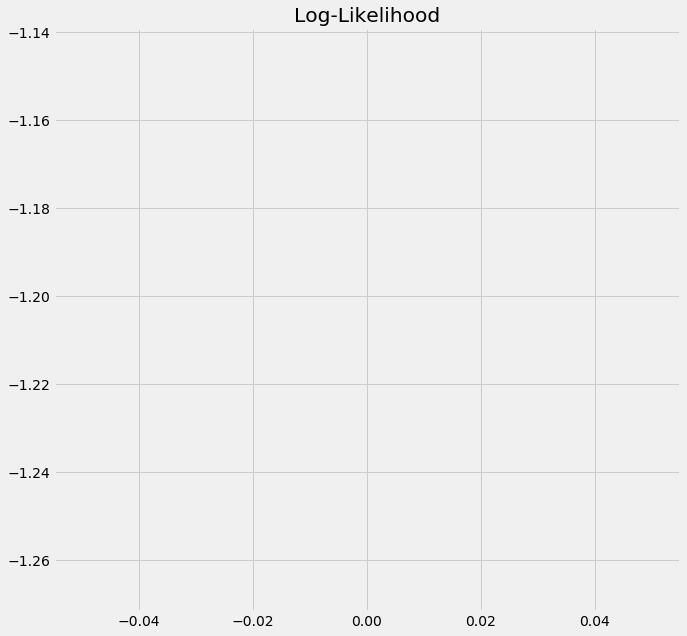

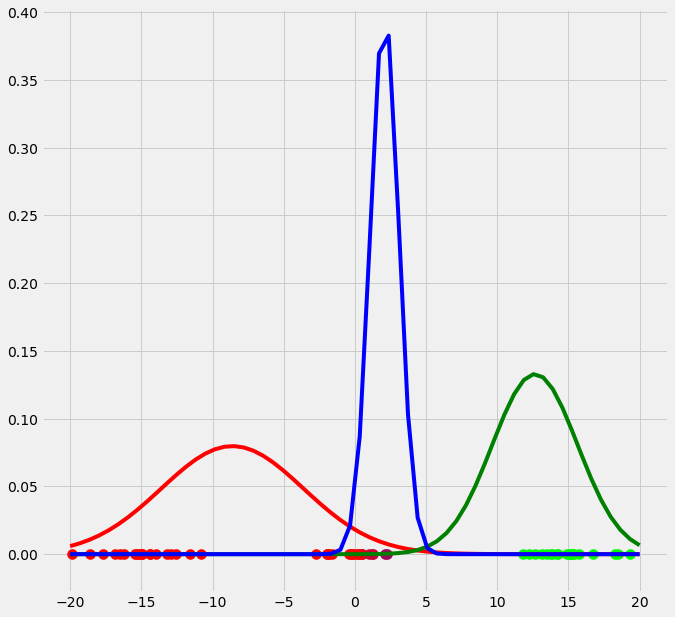

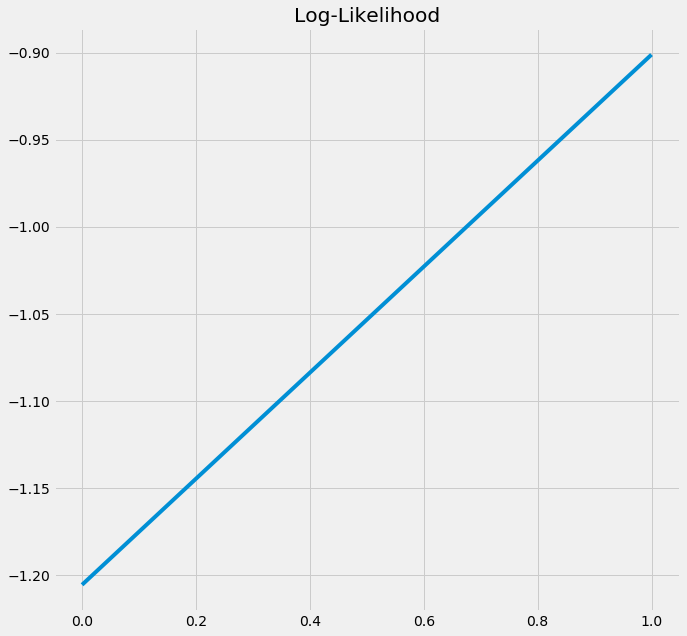

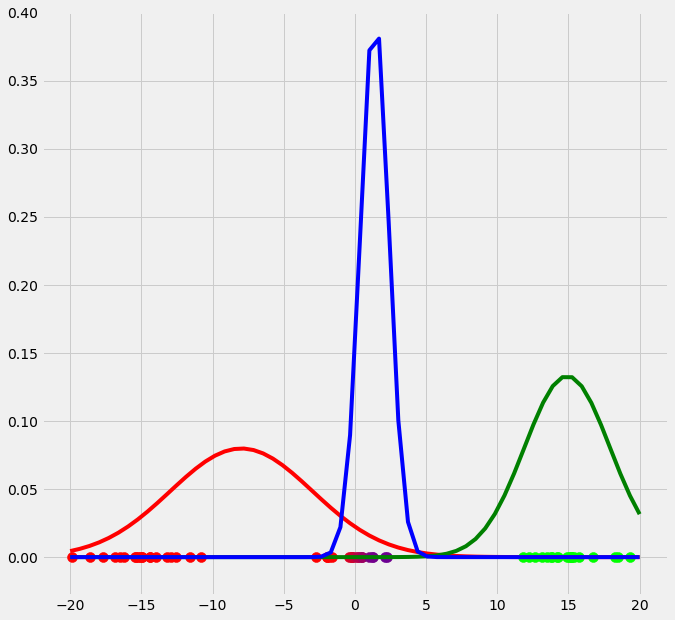

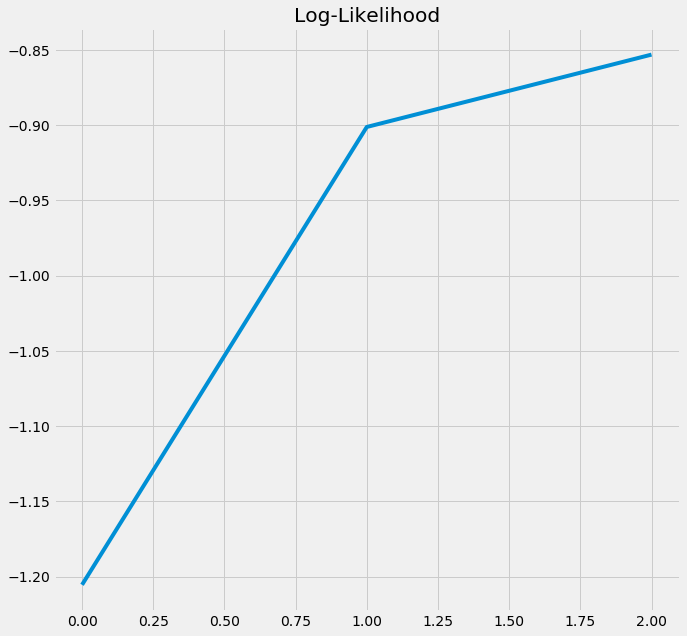

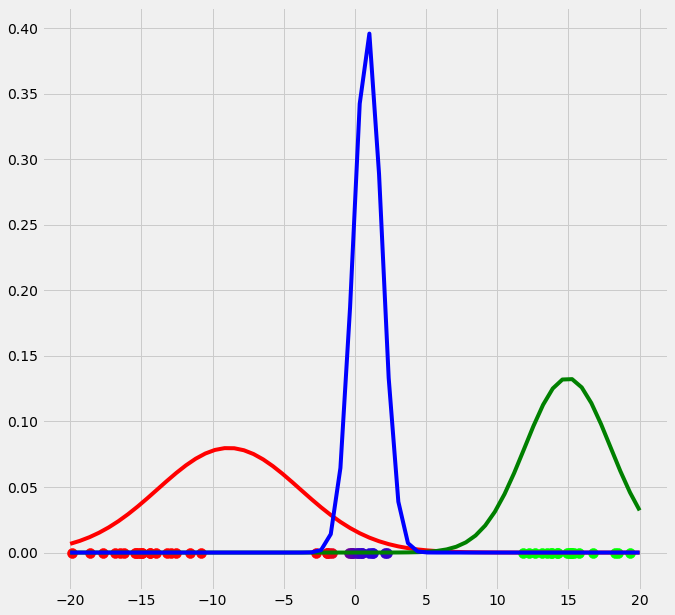

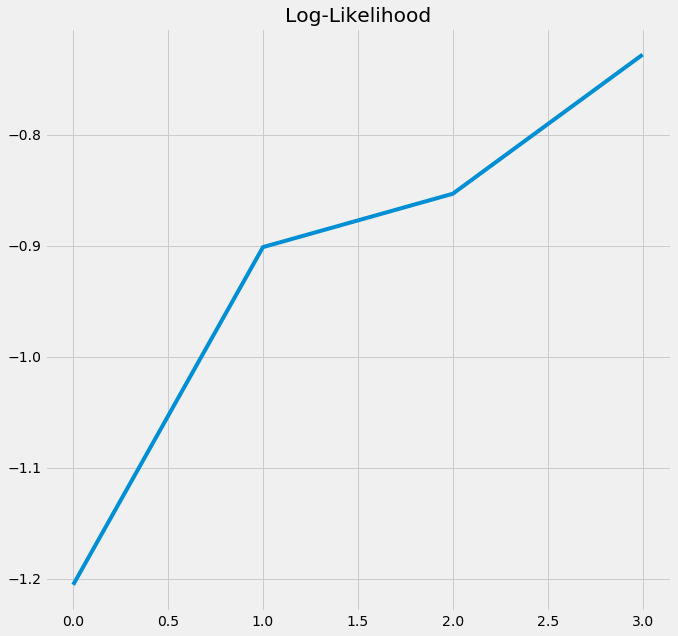

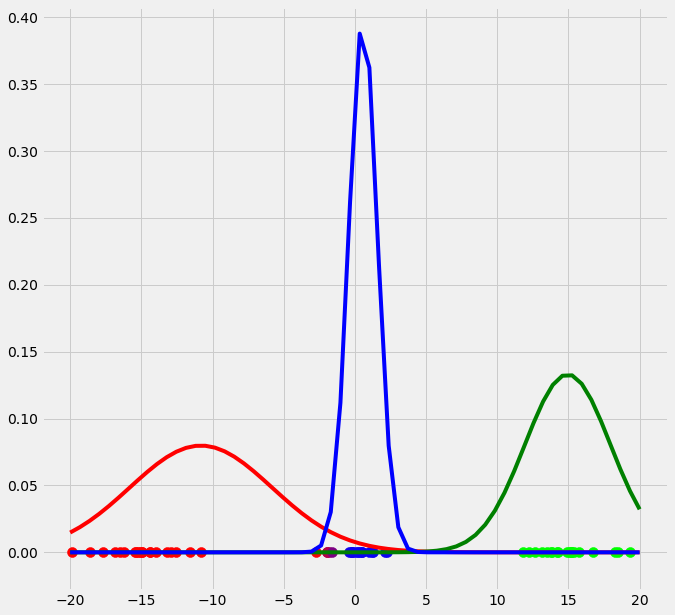

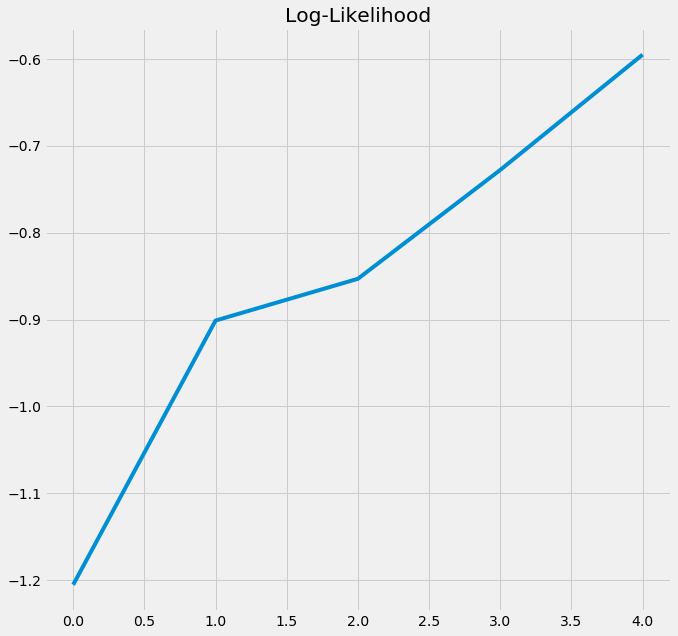

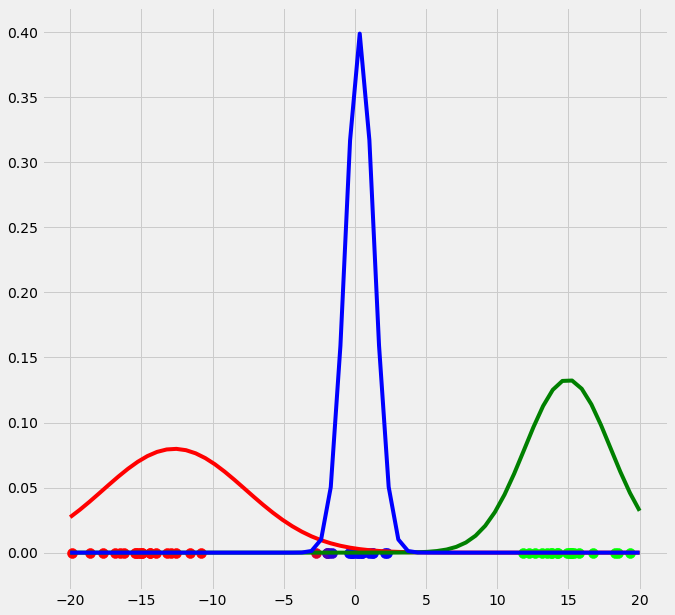

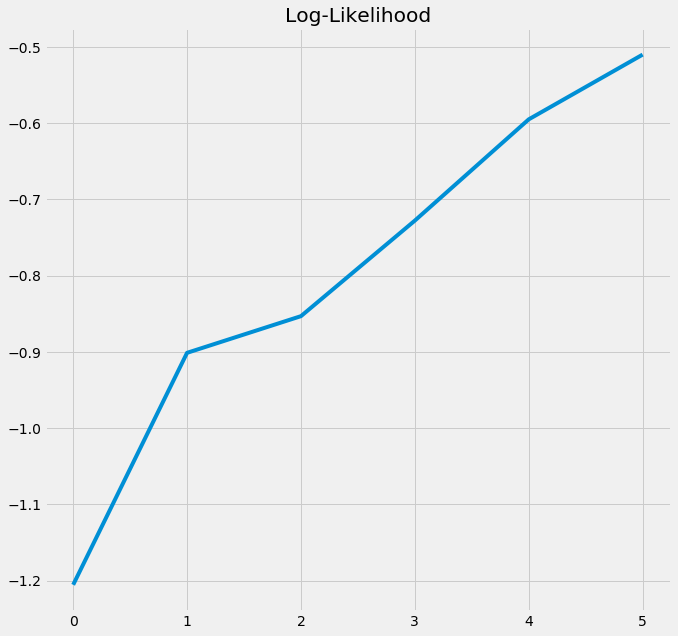

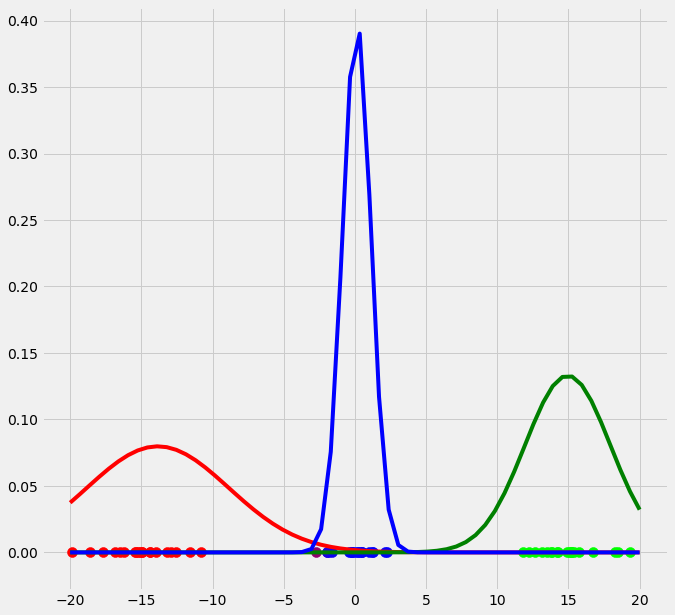

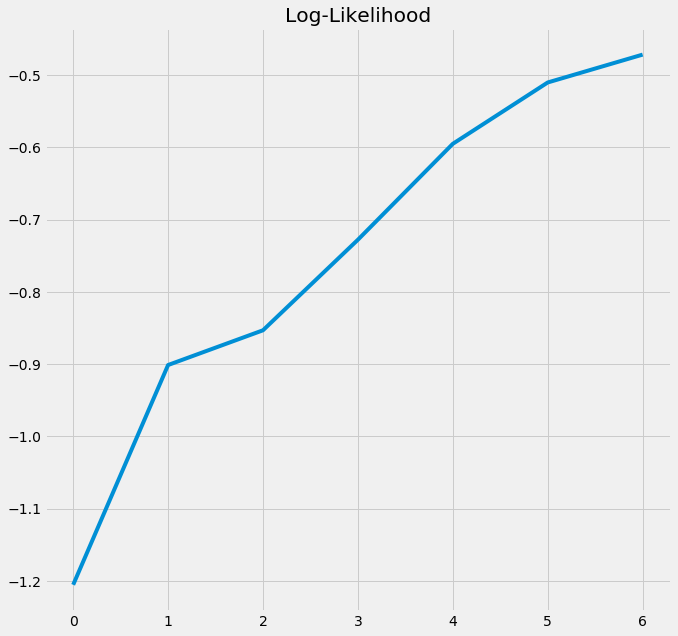

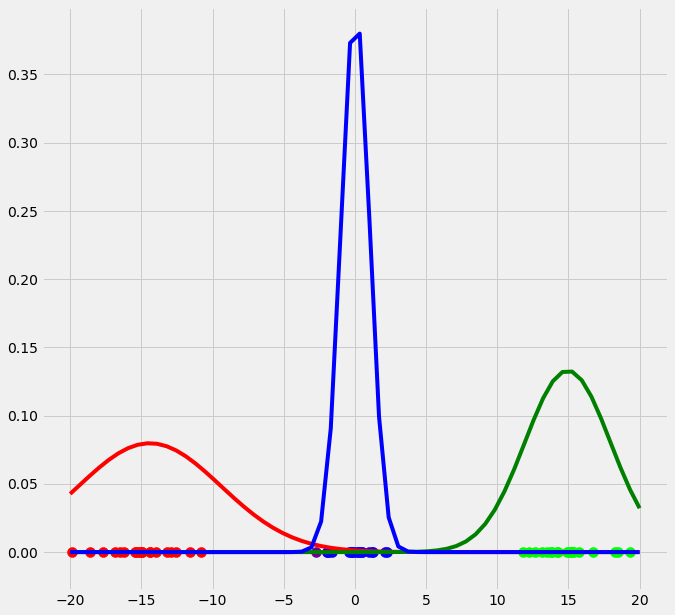

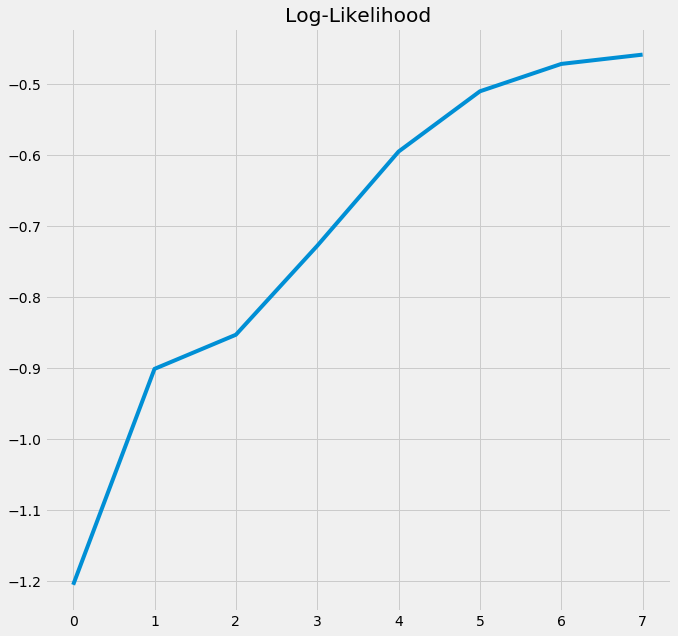

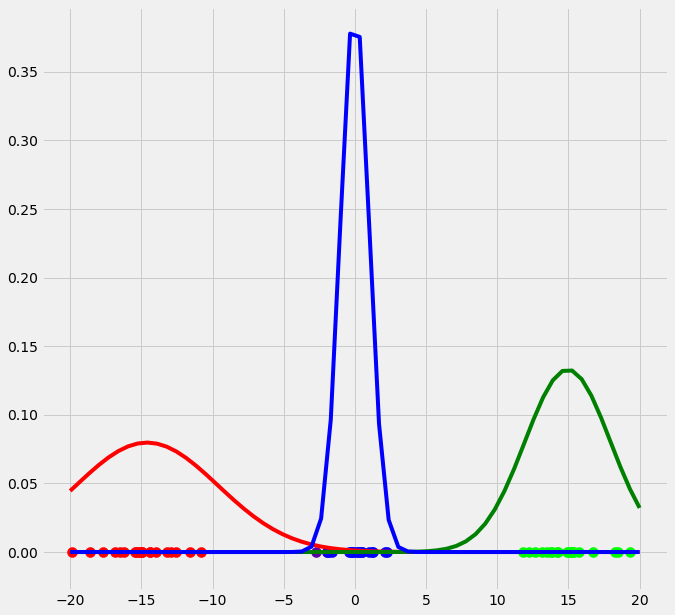

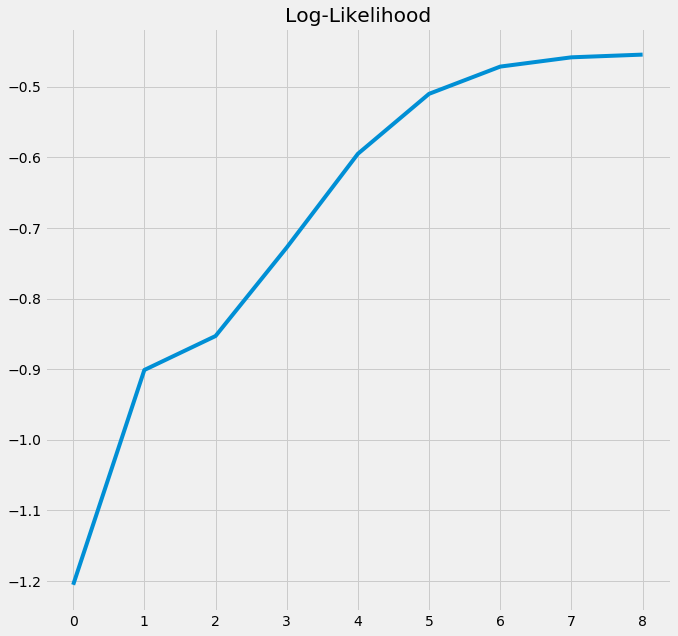

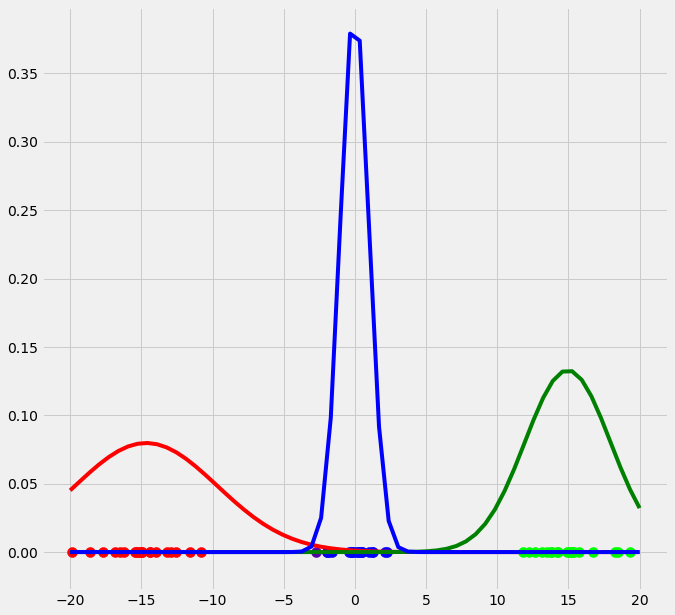

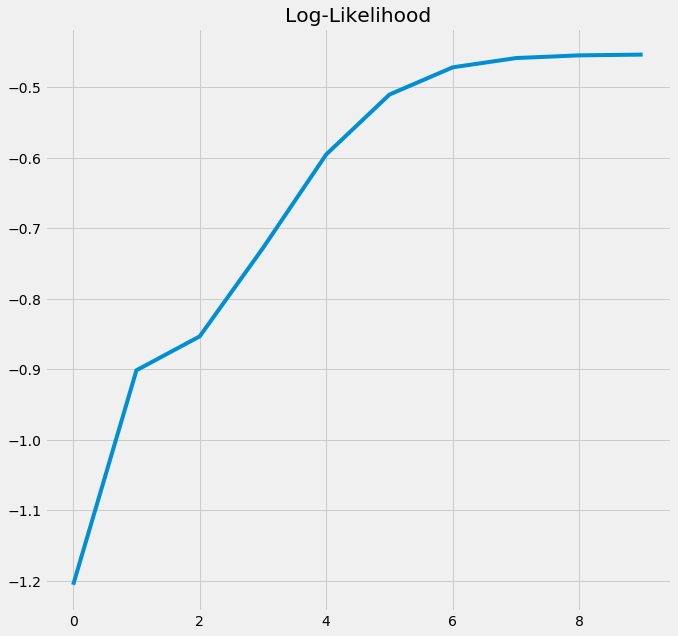

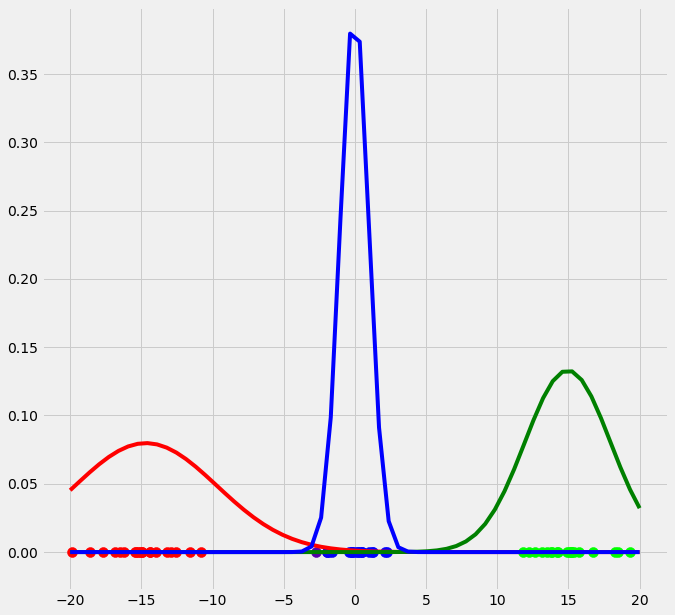

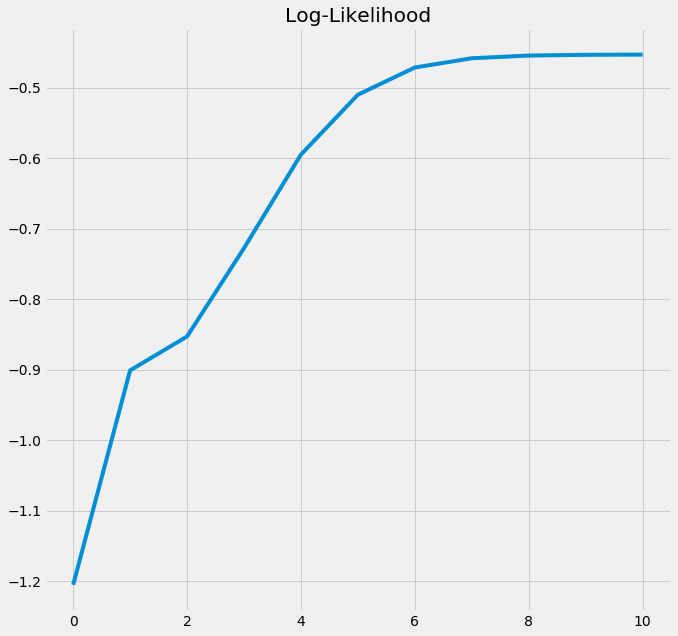

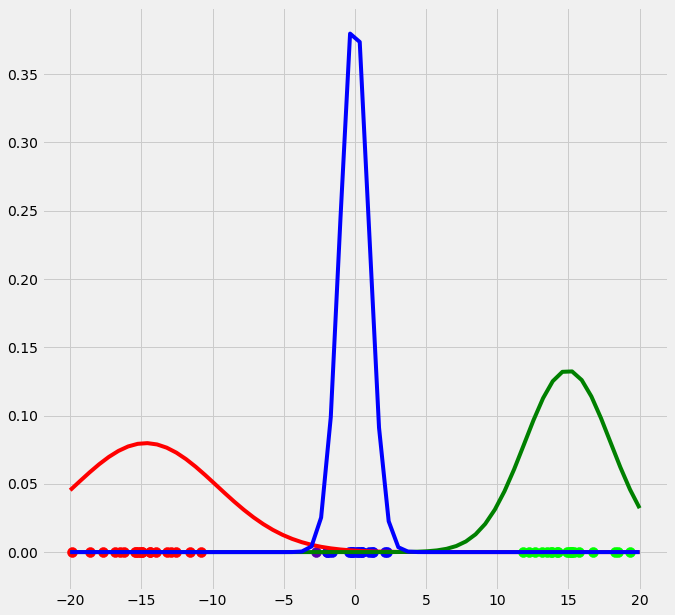

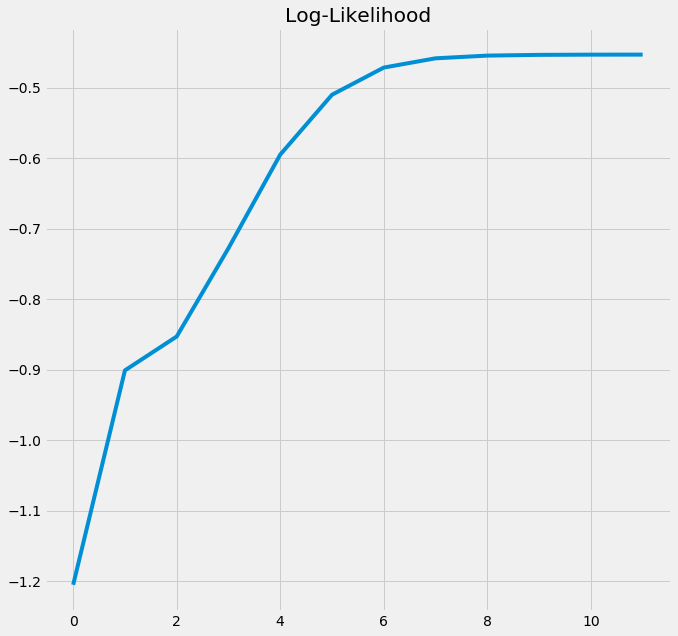

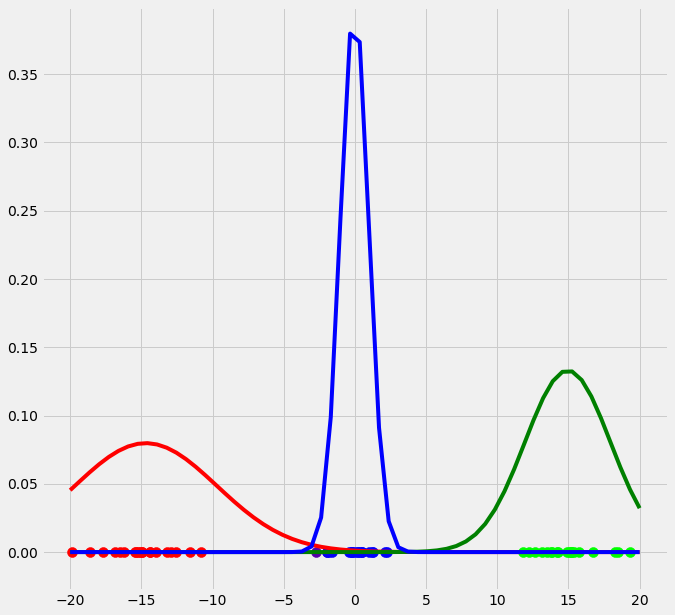

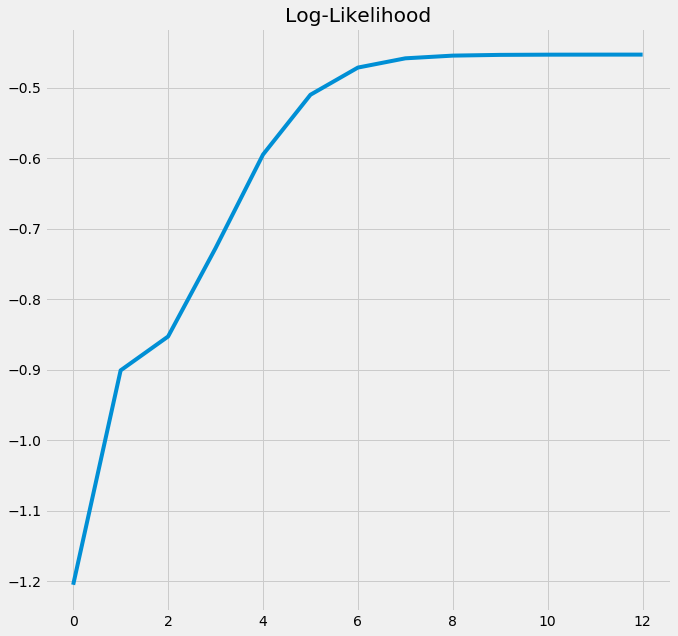

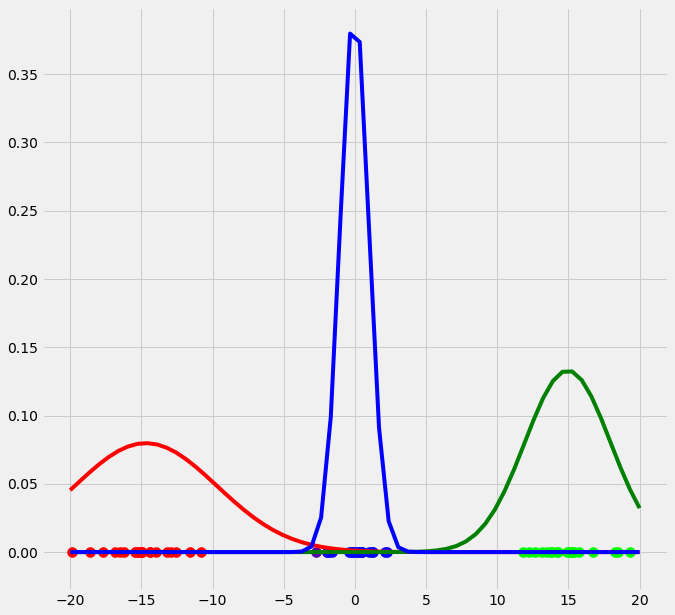

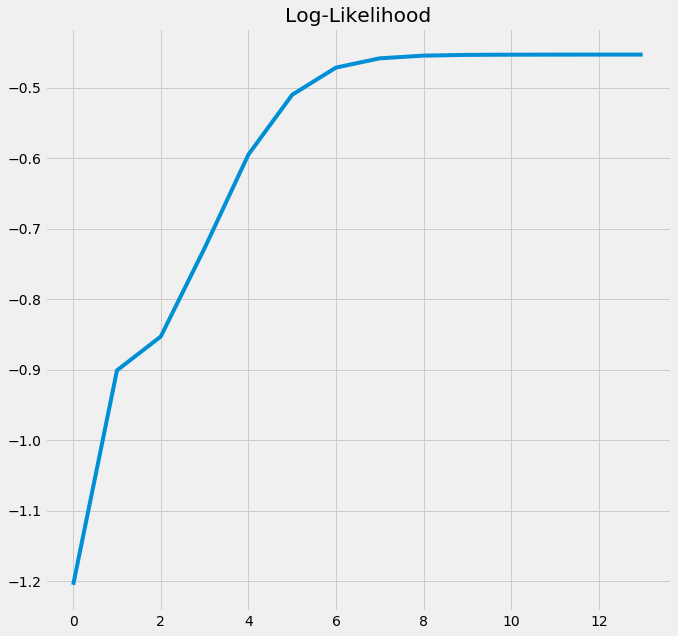

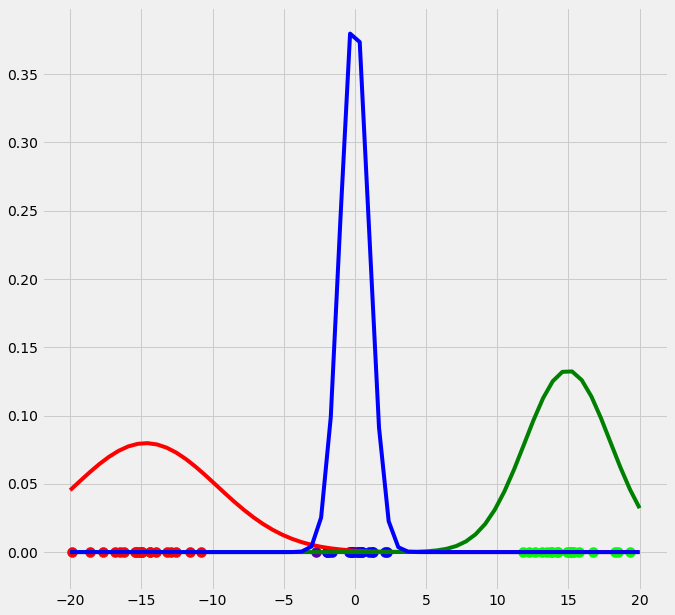

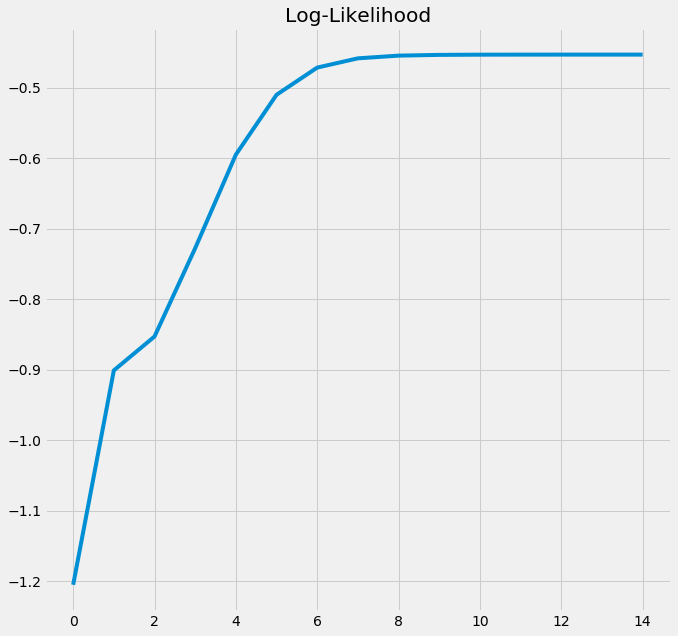

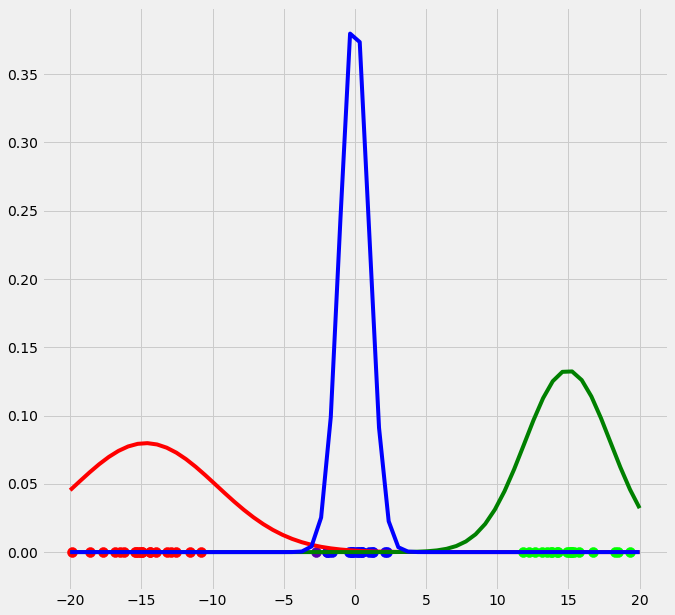

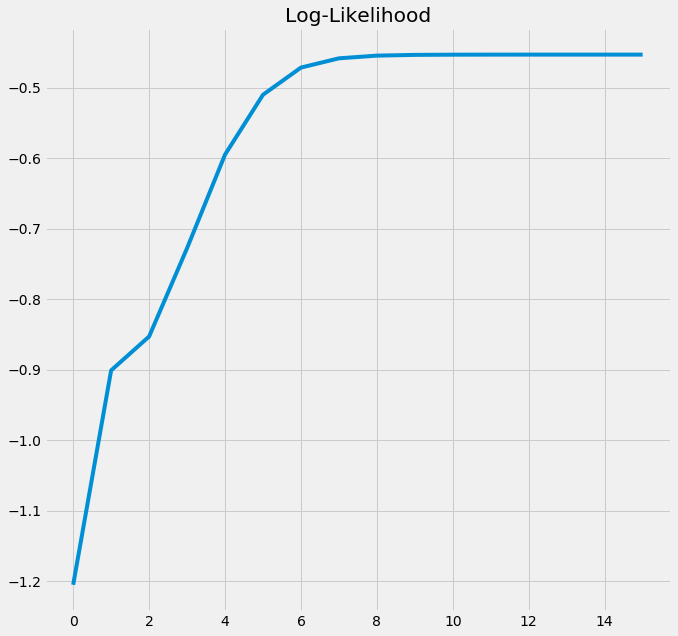

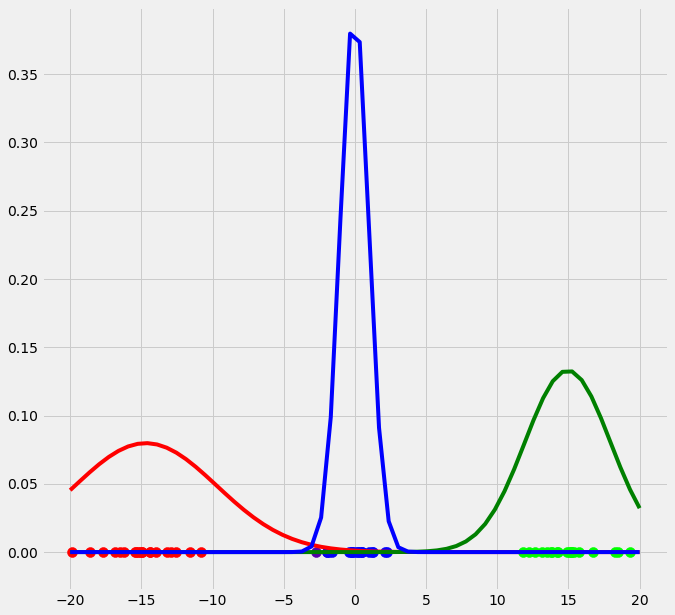

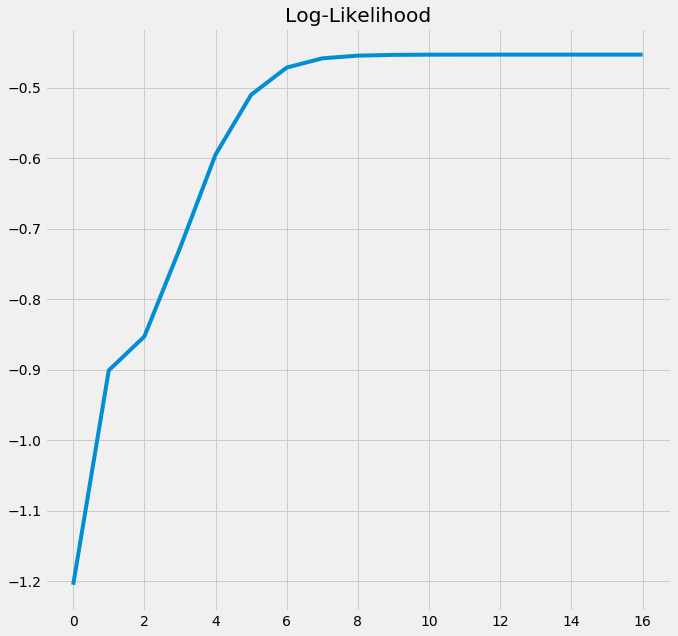

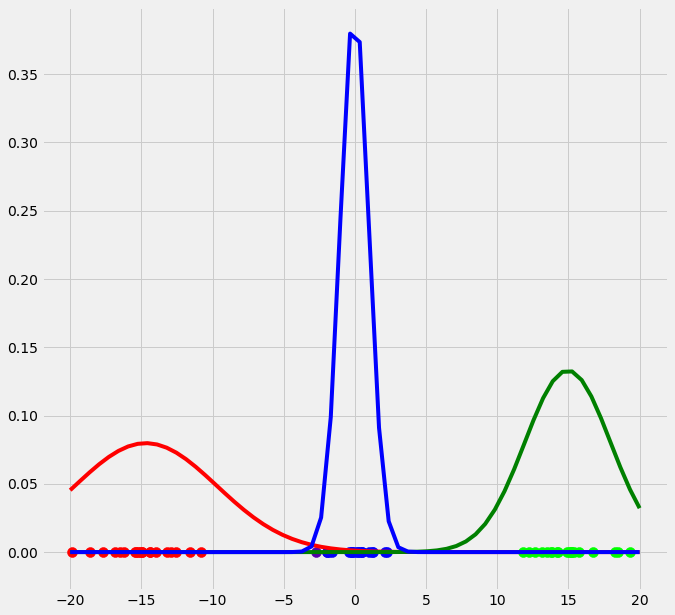

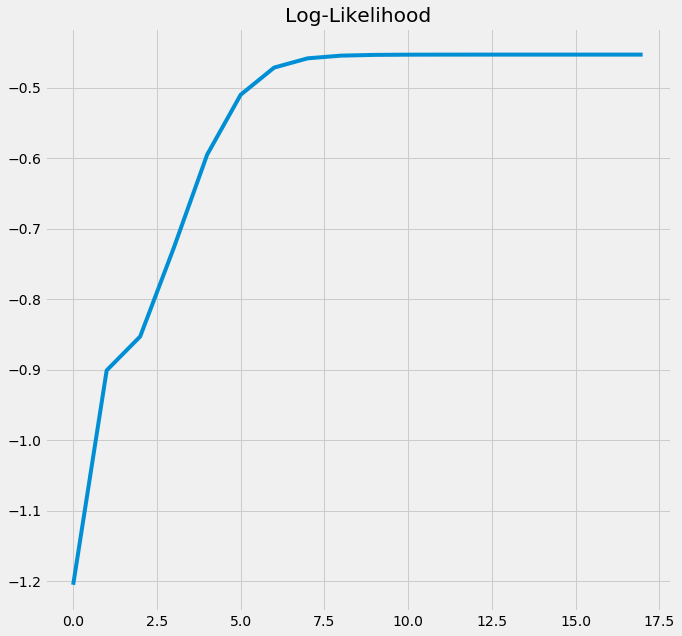

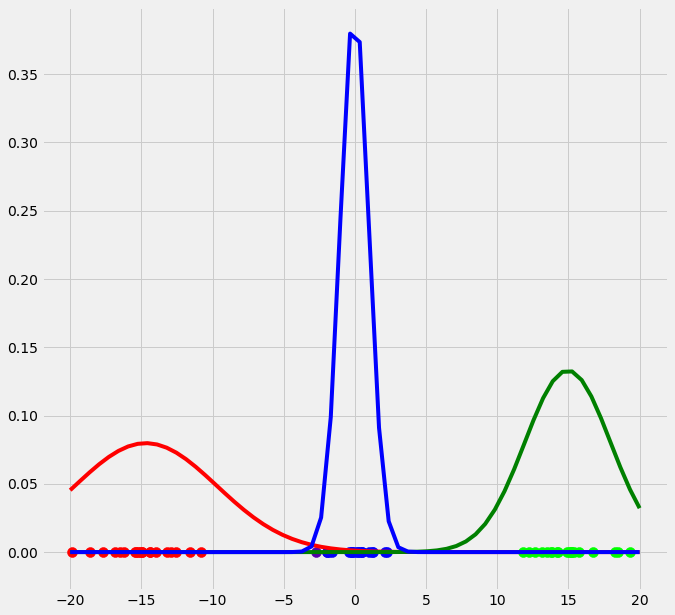

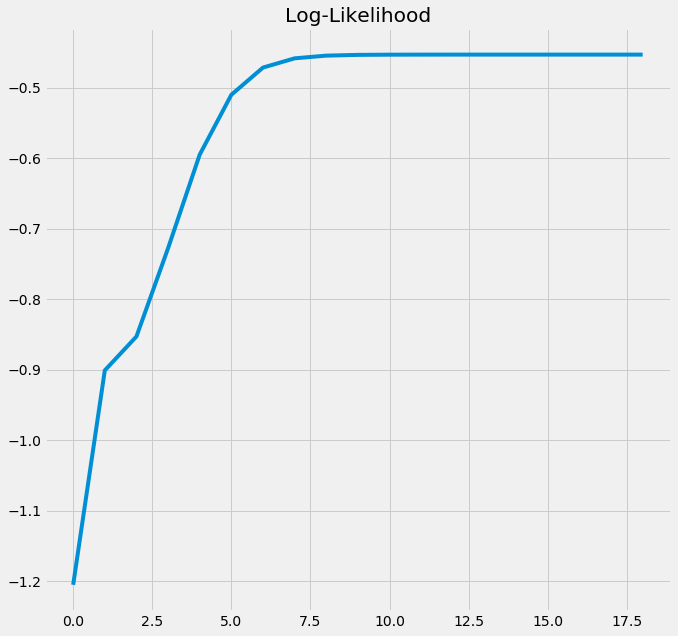

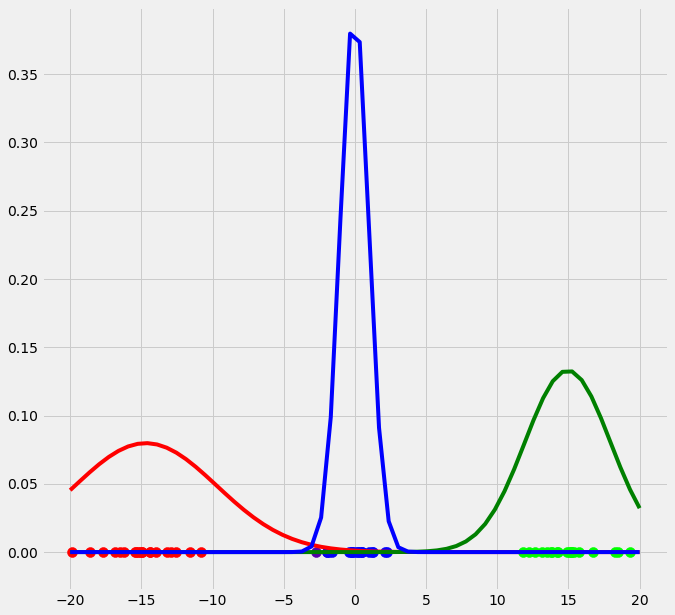

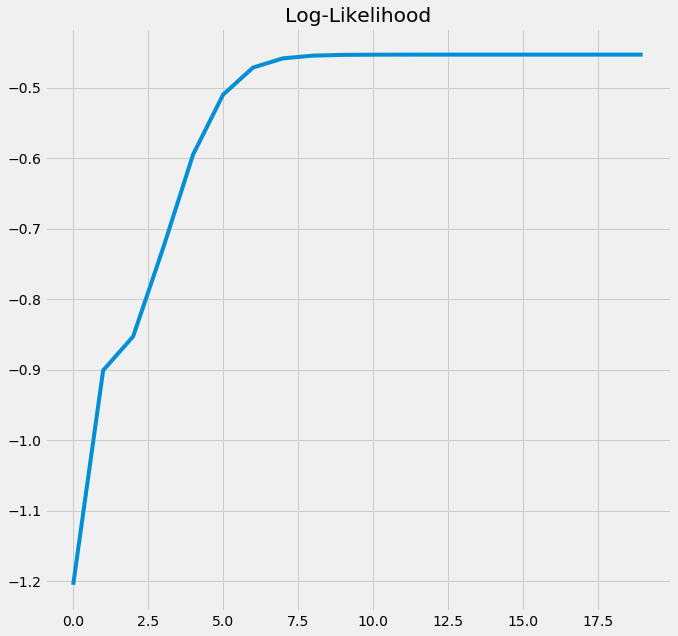

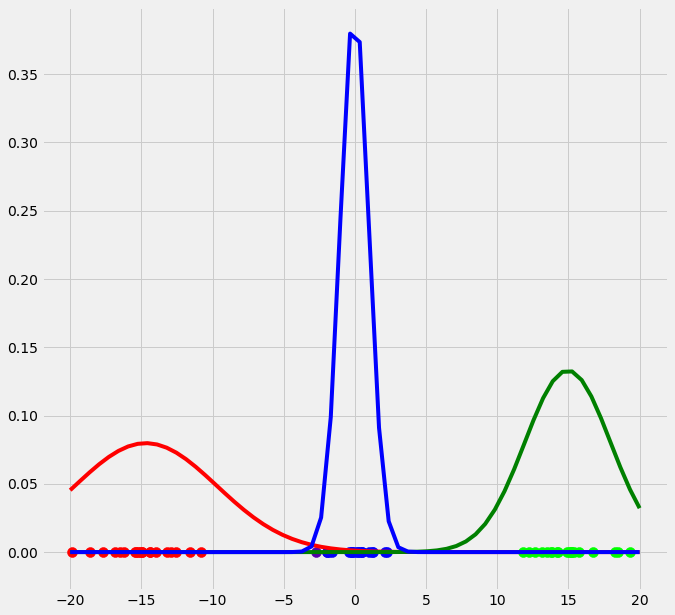

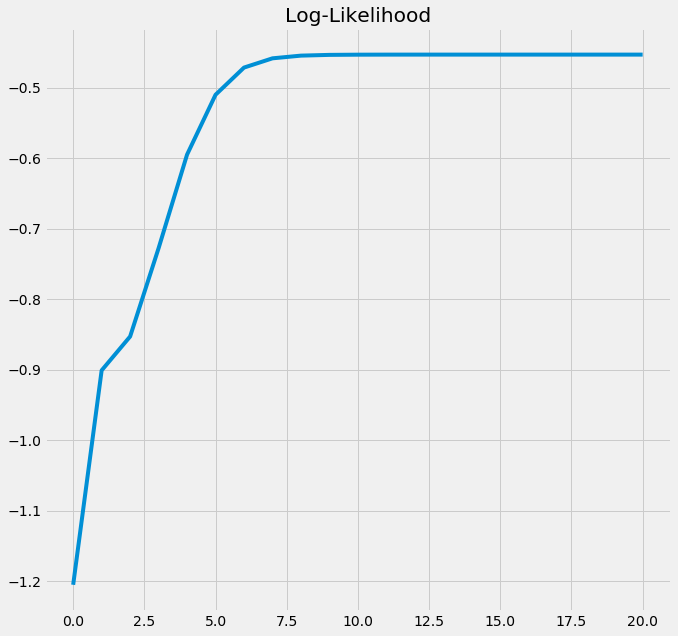

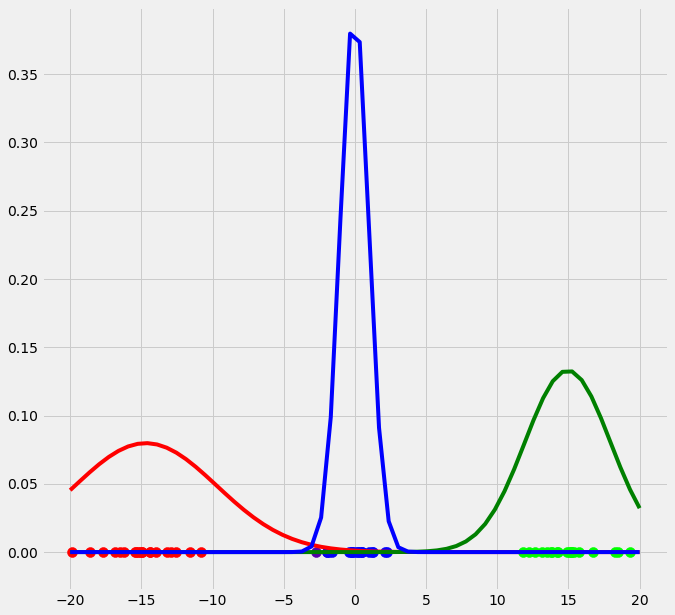

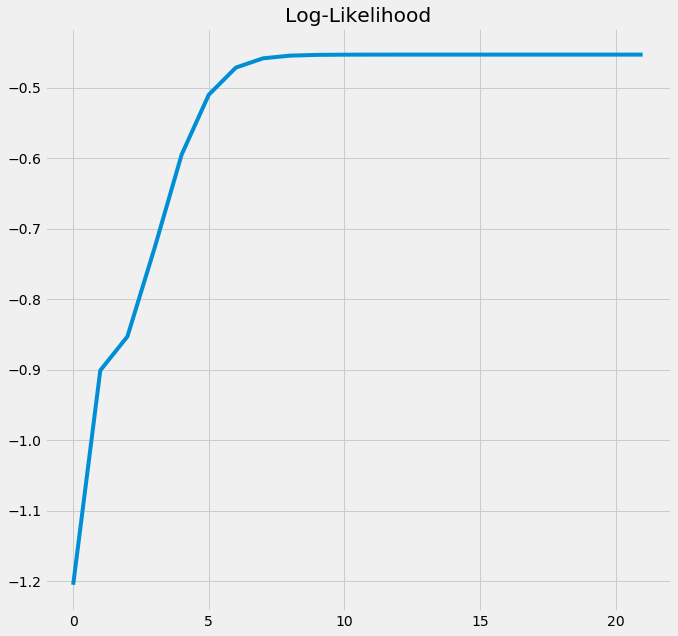

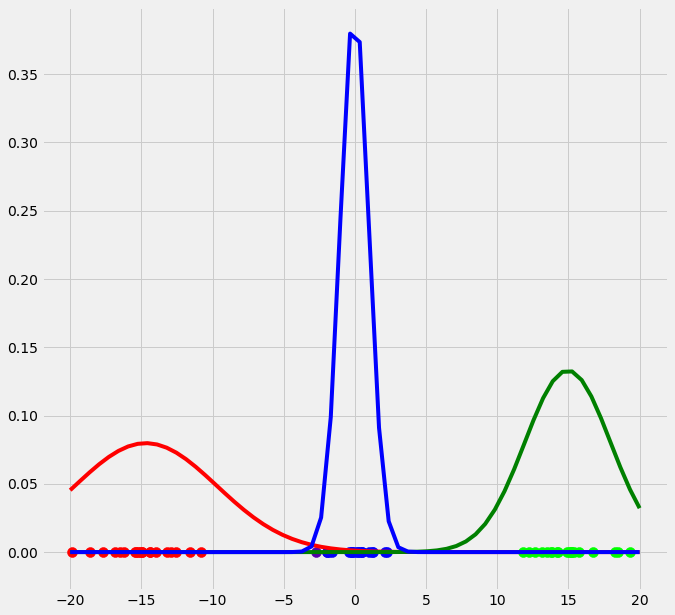

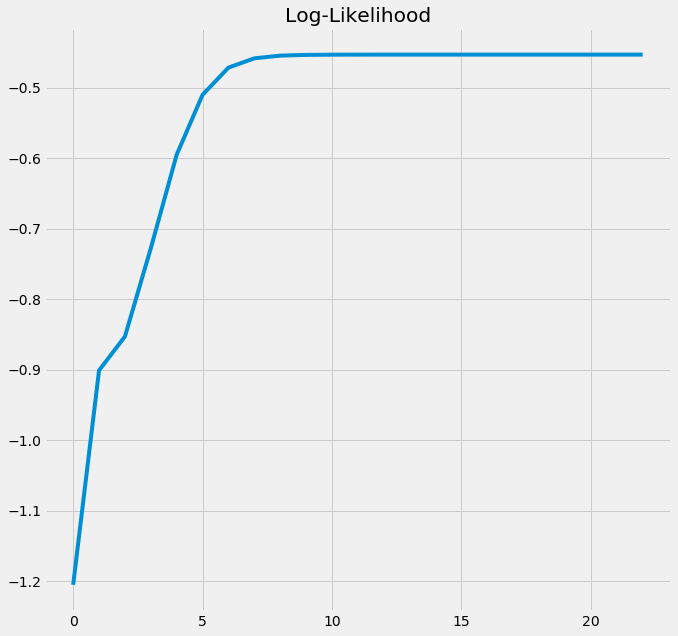

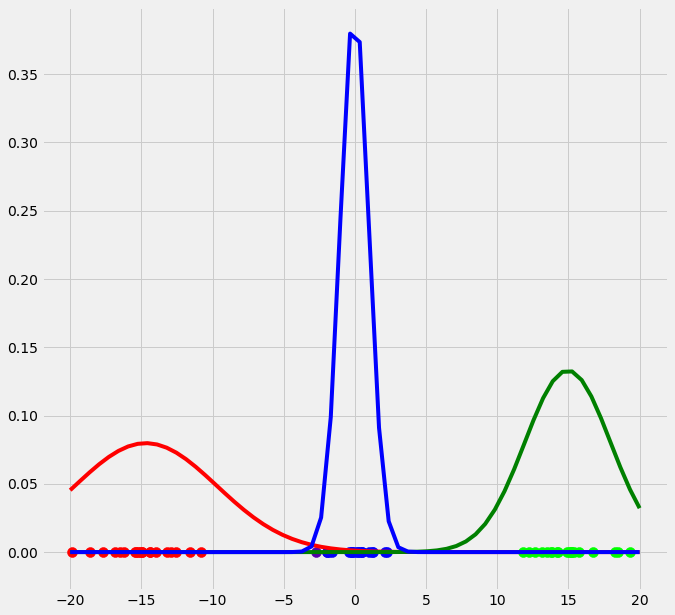

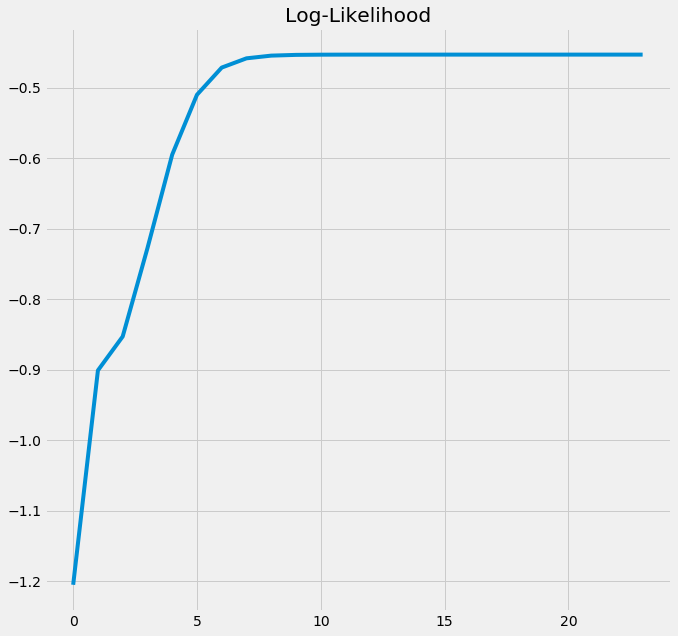

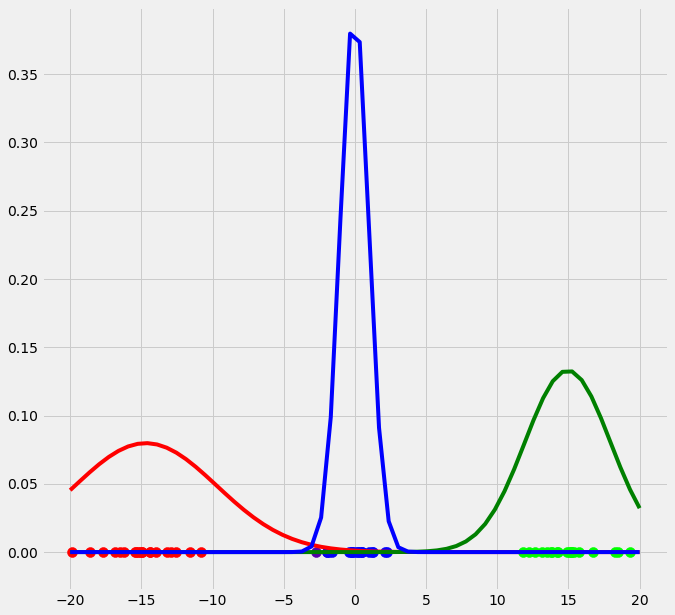

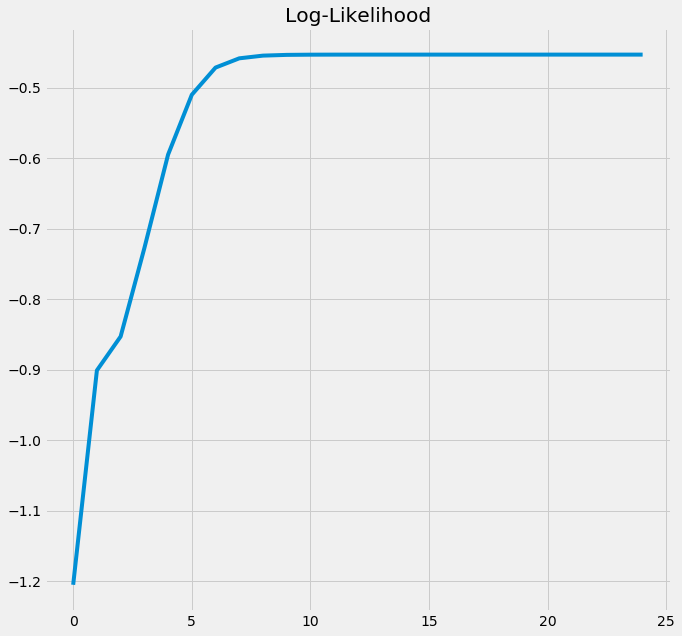

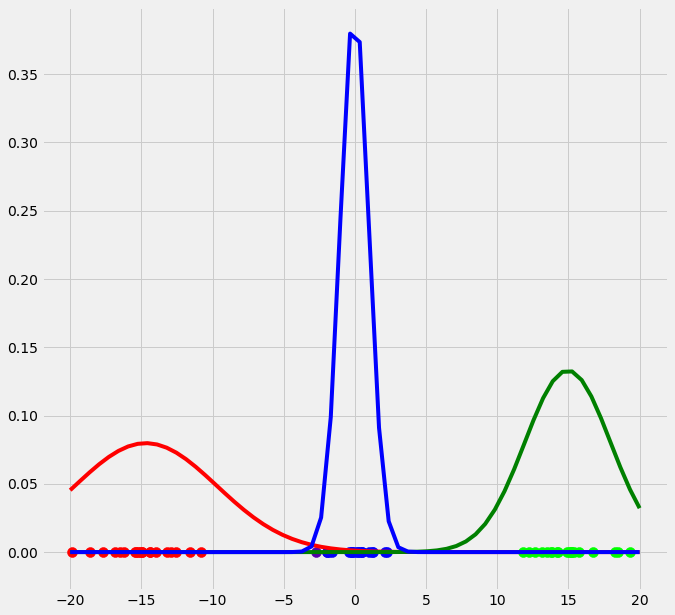

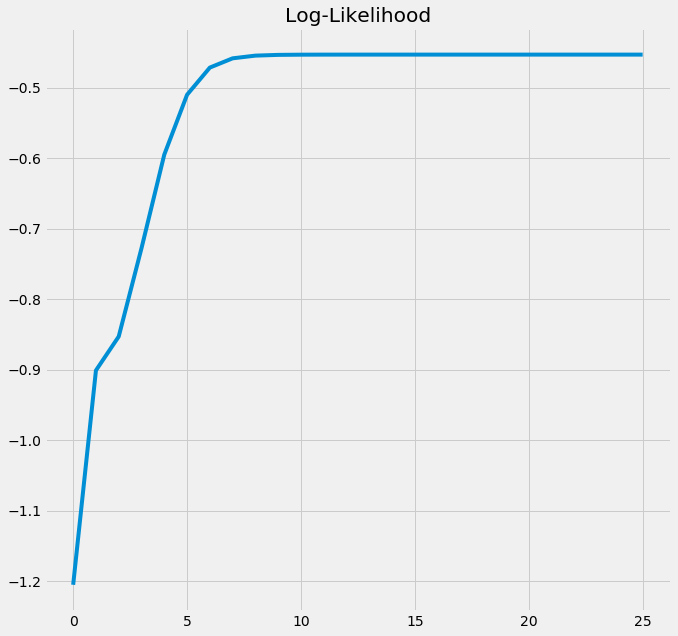

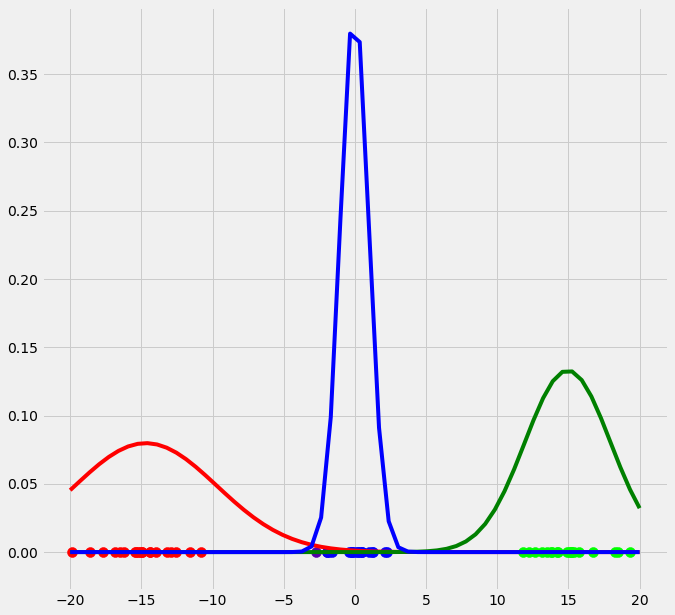

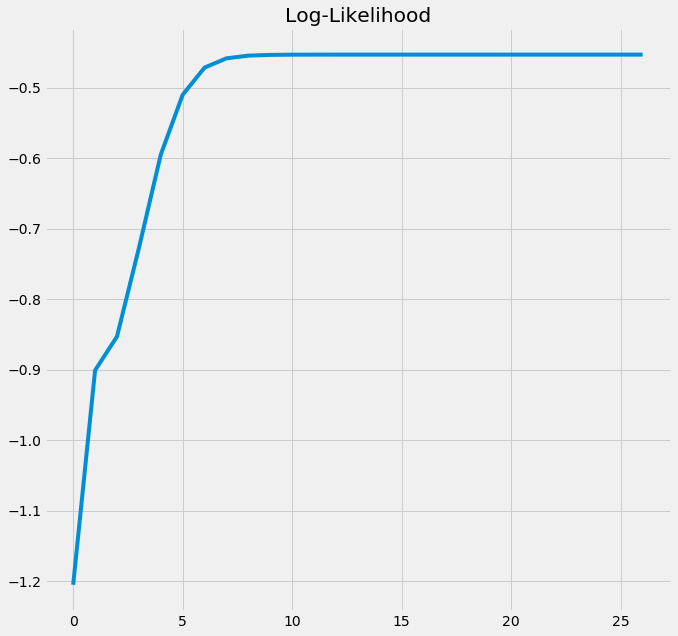

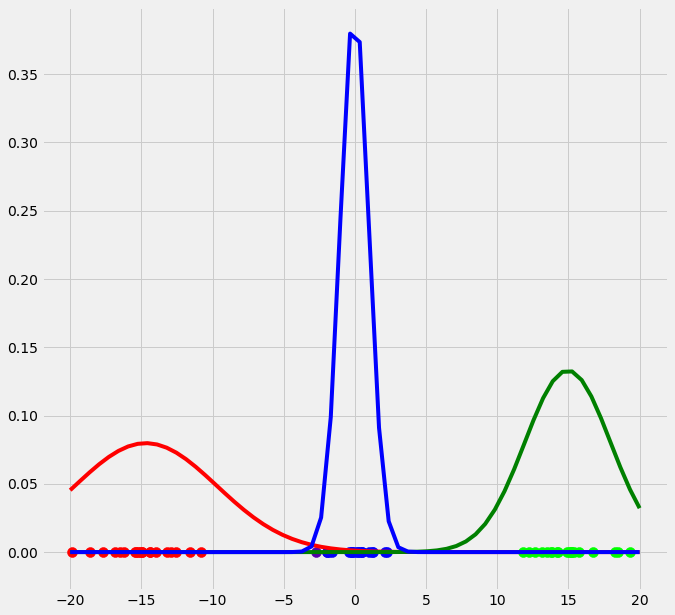

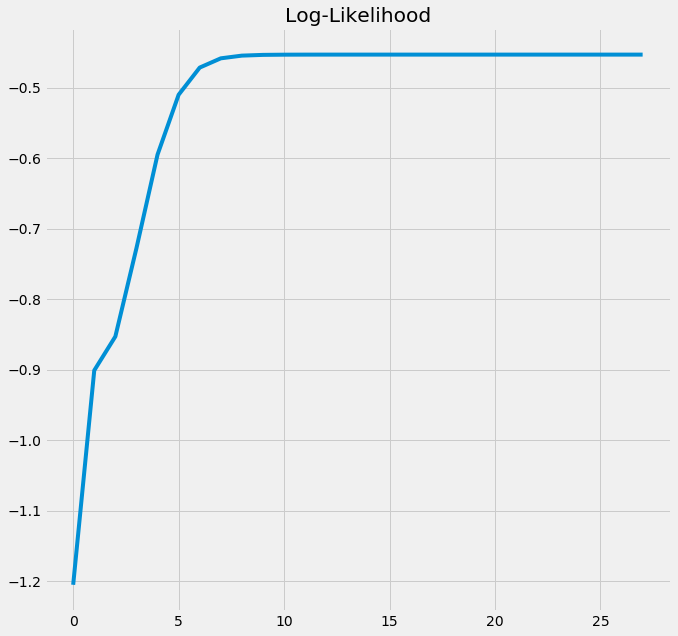

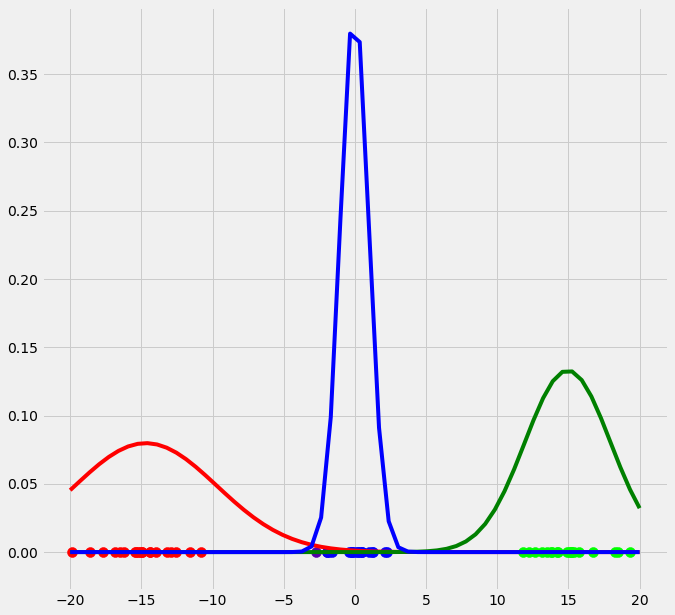

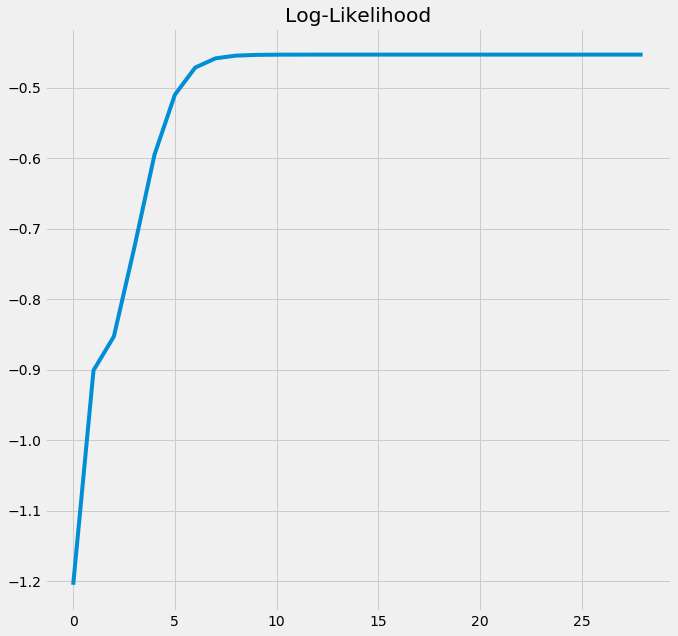

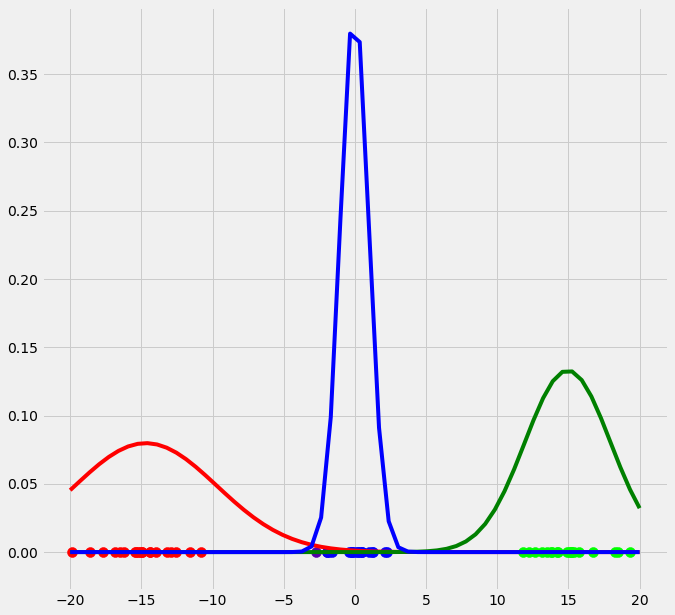

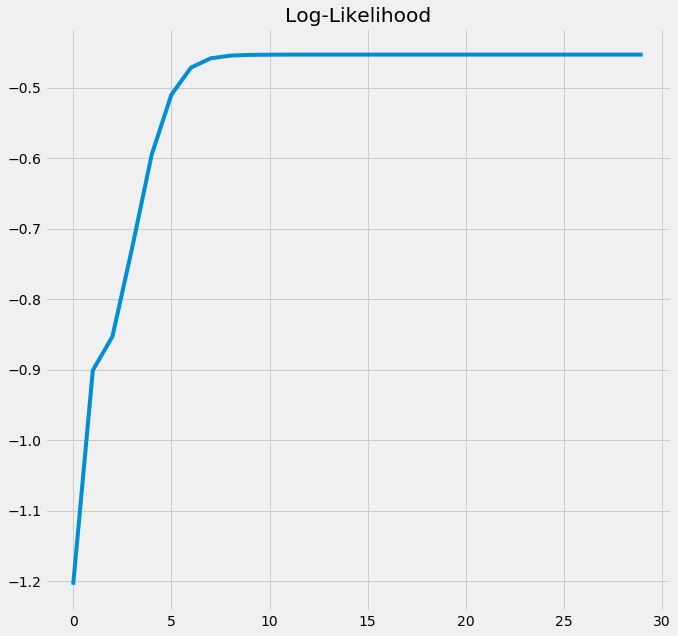

In [52]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
from scipy.stats import norm
np.random.seed(0)
X = np.linspace(-5,5,num=20)
X0 = X*np.random.rand(len(X))+15 # Create data cluster 1
X1 = X*np.random.rand(len(X))-15 # Create data cluster 2
X2 = X*np.random.rand(len(X)) # Create data cluster 3
X_tot = np.stack((X0,X1,X2)).flatten() # Combine the clusters to get the random datapoints from above
class GM1D:
    def __init__(self,X,iterations):
        self.iterations = iterations
        self.X = X
        self.mu = None
        self.pi = None
        self.var = None
  
    def run(self):
        
        """
        Instantiate the random mu, pi and var
        """
        self.mu = [-8,8,5]
        self.pi = [1/3,1/3,1/3]
        self.var = [5,3,1]
        loglikelihoods = []
        
        
        """
        E-Step
        """
        
        for iter in range(self.iterations):
            """Create the array r with dimensionality nxK"""
            r = np.zeros((len(X_tot),3))  
  
            """
            Probability for each datapoint x_i to belong to gaussian g 
            """
            for c,g,p in zip(range(3),[norm(loc=self.mu[0],scale=self.var[0]),
                                       norm(loc=self.mu[1],scale=self.var[1]),
                                       norm(loc=self.mu[2],scale=self.var[2])],self.pi):
                r[:,c] = p*g.pdf(X_tot) # Write the probability that x belongs to gaussian c in column c. 
                                      # Therewith we get a 60x3 array filled with the probability that each x_i belongs to one of the gaussians
            """
            Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points belonging to 
            cluster c
            """
            for i in range(len(r)):
                r[i] = r[i]/(np.sum(pi)*np.sum(r,axis=1)[i])
            """Plot the data"""
            fig = plt.figure(figsize=(10,10))
            ax0 = fig.add_subplot(111)
            for i in range(len(r)):
                ax0.scatter(self.X[i],0,c=np.array([r[i][0],r[i][1],r[i][2]]),s=100) 
            """Plot the gaussians"""
            for g,c in zip([norm(loc=self.mu[0],scale=self.var[0]).pdf(np.linspace(-20,20,num=60)),
                            norm(loc=self.mu[1],scale=self.var[1]).pdf(np.linspace(-20,20,num=60)),
                            norm(loc=self.mu[2],scale=self.var[2]).pdf(np.linspace(-20,20,num=60))],['r','g','b']):
                ax0.plot(np.linspace(-20,20,num=60),g,c=c)
            
            
            
            """M-Step"""
    
            """calculate m_c"""
            m_c = []
            for c in range(len(r[0])):
                m = np.sum(r[:,c])
                m_c.append(m) # For each cluster c, calculate the m_c and add it to the list m_c
            """calculate pi_c"""
            for k in range(len(m_c)):
                self.pi[k] = (m_c[k]/np.sum(m_c)) # For each cluster c, calculate the fraction of points pi_c which belongs to cluster c
            """calculate mu_c"""
            self.mu = np.sum(self.X.reshape(len(self.X),1)*r,axis=0)/m_c
            """calculate var_c"""
            var_c = []
            for c in range(len(r[0])):
                var_c.append((1/m_c[c])*np.dot(((np.array(r[:,c]).reshape(60,1))*(self.X.reshape(len(self.X),1)-self.mu[c])).T,(self.X.reshape(len(self.X),1)-self.mu[c])))
            plt.show()
            
            loglikelihoods.append(np.log(np.sum([k*norm(self.mu[i],self.var[j]).pdf(X) for k,i,j in zip(self.pi,range(len(self.mu)),range(len(self.var)))])))
            
            fig = plt.figure(figsize=(10,10))
            ax0 = fig.add_subplot(111)
            ax0.plot(range(0, iter+1, 1), loglikelihoods)
            ax0.set_title('Log-Likelihood')
            
GM1D = GM1D(X_tot,30)
GM1D.run()